        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Individual Project - Fall 2020</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [131]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\aksha\anaconda3\lib\site-packages (2.3.1)


You can also check the version of it using the following code.

In [163]:
import tensorflow as tf
tf.__version__

'2.3.1'

Now, it's time to load the dataset

In [164]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [165]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

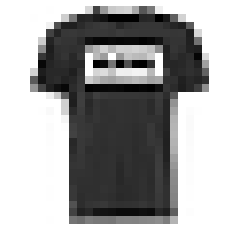

In [167]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[1]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [136]:
y_train[1]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [137]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[1]])

T-shirt/top


Now, it's your turn,

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

<b>Initalizing All the libraries used for Project</b>

In [144]:
# Initailizing all the libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import cv2
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

<h3><b> Flattening the Image from 28*28 to 784 </b></h3>

<h3><b>Initializing the PCA Component to reduced dimension to 150 columns</b></h3>

In [139]:
# preprocessing the dataset
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)

# Dimensions Reduction
pca = PCA(svd_solver='randomized', n_components=150, whiten=True, random_state=0)

X_train Shape (60000, 784)
X_test Shape (10000, 784)


<h1>Initializing Model Logistic Regression</h1>

In [145]:
# Task 1

# Model Logistic Regression
lr = LogisticRegression(random_state = 0)
model_lr = make_pipeline(pca, lr)
%time model_lr.fit(X_train, y_train)
y_test_hat_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(y_test,y_test_hat_lr, normalize = True) * 100
print(acc_lr)

Wall time: 8.18 s
84.21


<h1>Initializing Model Naive Bayes</h1>

In [141]:
# Model Naive Bayes
gnb = GaussianNB()
model_nb = make_pipeline(pca, gnb)
%time model_nb.fit(X_train, y_train)
y_test_hat_nb = model_nb.predict(X_test)
acc_nb = accuracy_score(y_test,y_test_hat_nb, normalize = True) * 100
print(acc_nb)

Wall time: 3.79 s
74.86


<h1>Initializing Model K - Nearest Neighbour Classifier</h1>

In [22]:
# Model K-Nearest Neighbour Classifier
knn = KNeighborsClassifier()
pca = PCA(svd_solver='randomized', n_components=150, whiten=True, random_state=0) 
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
# model = make_pipeline(pca, knn)
param_grid = {'n_neighbors': [2,3,4]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(knn, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
%time grid.fit(X_train, y_train)
bestModel = grid.best_estimator_
y_test_hat = bestModel.predict(X_test)
print(accuracy_score(y_test,y_test_hat, normalize = True) * 100 )

Wall time: 2d 15h 20min 40s
9.75


<h1>Initializing Model SVM</h1>

In [147]:
# Model SVM
svc = SVC(kernel='rbf',  class_weight='balanced')
model_svc = make_pipeline(pca, svc)
param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.001, 0.005]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model_svc, param_grid, cv = cv, scoring='accuracy')
%time grid.fit(X_train, y_train)
bestModel_svc = grid.best_estimator_
y_test_hat_svm = bestModel_svc.predict(X_test)
acc_svm = accuracy_score(y_test,y_test_hat_svm, normalize = True) * 100 
print(acc_svm)

Wall time: 3h 28min 43s
90.07


<h1>Initializing Model Decision Tree</h1>

In [142]:
# Model Decision Tree

dt = DecisionTreeClassifier()
pca = PCA(svd_solver='randomized', n_components=150, whiten=True, random_state=0) 
X_train_pca_dt = pca.fit_transform(X_train)
X_test_pca_dt = pca.fit_transform(X_test)
param_grid = {'max_depth': [10,11,12]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(dt, param_grid, cv = cv, scoring='accuracy',return_train_score=True)
%time grid.fit(X_train_pca_dt, y_train)
bestModel_dt = grid.best_estimator_
y_test_hat_dt = bestModel_dt.predict(X_test_pca_dt)
acc_dt = accuracy_score(y_test,y_test_hat_dt, normalize = True) * 100 
print(acc_dt)

Wall time: 2min 15s
45.89


<h1>Initializing Model Neural Network</h1>

In [146]:
# Model Neural Network

model_nn = MLPClassifier(solver='lbfgs',random_state=0, 
                      hidden_layer_sizes=[50,50])
pca = PCA(svd_solver='randomized', n_components=150, whiten=True, random_state=0) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
%time model_nn.fit(X_train_pca, y_train)
y_test_hat_nn = model_nn.predict(X_test_pca)
acc_nn = accuracy_score(y_test,y_test_hat_nn, normalize = True) * 100 
print(acc_nn)

Wall time: 1min 6s
38.41


<h3>Visualizing In Sample Accuracy for Linear Regression.</h3>

In [148]:
# Model Logistic Regression
y_test_hat_lr_out = model_lr.predict(X_train)
acc_lr_out = accuracy_score(y_train,y_test_hat_lr_out, normalize = True) * 100
print("Logistic Regression: ",acc_lr_out)

Logistic Regression:  86.24833333333333


<h3>Visualizing In Sample Accuracy for Naive Bayes.</h3>

In [149]:
# Model Naive Bayes
y_test_hat_nb_out = model_nb.predict(X_train)
acc_nb_out = accuracy_score(y_train,y_test_hat_nb_out, normalize = True) * 100
print("Naive Bayes: ",acc_nb_out)

Naive Bayes:  76.10666666666667


<h3>Visualizing In Sample Accuracy for K - Nearest Neighbour.</h3>

In [150]:
# Model K - nearest Neighbour
# Not find because takes to much time to fit the data. Ruled Out.

<h3>Visualizing In Sample Accuracy for SVM.</h3>

In [151]:
# Model SVM
y_test_hat_svm_out = bestModel_svc.predict(X_train)
acc_svm_out = accuracy_score(y_train,y_test_hat_svm_out, normalize = True) * 100
print("SVM: ",acc_svm_out)


SVM:  98.53


<h3>Visualizing In Sample Accuracy for Decision Tree.</h3>

In [152]:
# Model Decision Tree
X_train_dt = pca.fit_transform(X_train)
y_test_hat_dt_out = bestModel_dt.predict(X_train_dt)
acc_dt_out = accuracy_score(y_train,y_test_hat_dt_out, normalize = True) * 100
print("Decision Tree: ",acc_dt_out)

Decision Tree:  84.095


<h3>Visualizing In Sample Accuracy for Neural Netwrok.</h3>

In [153]:
# Model Neural Netwrok
X_train_nn = pca.fit_transform(X_train)
y_test_hat_nn_out = model_nn.predict(X_train_nn)
acc_nn_out = accuracy_score(y_train,y_test_hat_nn_out, normalize = True) * 100
print("Neural Network: ",acc_nn_out)

Neural Network:  95.355


<h3> Visualizing Confusion Matrix and Classification Report for Logistic Regression</h3>

In [154]:
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_test_hat_lr))
print('\nClassification Report\n')
print(classification_report(y_test,y_test_hat_lr))

Confusion Matrix

[[814   2  15  51   6   2  97   1  12   0]
 [  2 956   5  26   5   0   4   0   2   0]
 [ 18   4 726  11 133   1  94   2  10   1]
 [ 34  12  11 869  26   1  42   0   5   0]
 [  0   1 118  37 757   0  82   0   5   0]
 [  0   0   0   2   0 927   0  51   2  18]
 [145   2 127  44 107   0 550   0  25   0]
 [  0   0   0   0   0  32   0 938   0  30]
 [  5   1   7  12   3   3  20   6 942   1]
 [  0   1   0   0   0  18   1  37   1 942]]

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.72      0.73      0.72      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.76      0.74      1000
           5       0.94      0.93      0.93      1000
           6       0.62      0.55      0.58      1000
           7       0.91      0.94      0.92      1000
           8       0.94      0.94      0

<h3> Visualizing Confusion Matrix and Classification Report for Naive Bayes</h3>

In [155]:
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_test_hat_nb))
print('\nClassification Report\n')
print(classification_report(y_test,y_test_hat_nb))

Confusion Matrix

[[724   1  16  58   7   7  74   0 113   0]
 [ 10 879  15  51   3   3  10   0  29   0]
 [ 15   0 617   6 125   6 138   1  92   0]
 [ 51  10   9 762  39   9  55   0  65   0]
 [  4   0 106  31 668   3 116   0  72   0]
 [  3   0   3   1   0 736  40 175  31  11]
 [151   0  99  40  77  13 499   0 121   0]
 [  1   0   0   0   0  77   3 863   0  56]
 [ 24   0   8   5  11  12  45  29 864   2]
 [  0   0   0   0   0  22   7  72  25 874]]

Classification Report

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.99      0.88      0.93      1000
           2       0.71      0.62      0.66      1000
           3       0.80      0.76      0.78      1000
           4       0.72      0.67      0.69      1000
           5       0.83      0.74      0.78      1000
           6       0.51      0.50      0.50      1000
           7       0.76      0.86      0.81      1000
           8       0.61      0.86      0

<h3> Visualizing Confusion Matrix and Classification Report for SVM</h3>

In [156]:
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_test_hat_svm))
print('\nClassification Report\n')
print(classification_report(y_test,y_test_hat_svm))

Confusion Matrix

[[856   1  15  16   2   5  97   0   8   0]
 [  1 978   0  14   4   1   2   0   0   0]
 [ 25   1 826   9  70   2  66   0   1   0]
 [ 19   2  10 908  29   2  28   0   2   0]
 [  1   0  85  24 835   1  53   0   1   0]
 [  0   0   0   0   0 981   0  15   0   4]
 [133   0  72  21  60   0 705   0   9   0]
 [  0   0   0   0   0   9   0 979   0  12]
 [  1   0   3   5   3   3   6   3 976   0]
 [  1   0   0   0   0   8   0  28   0 963]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       1.00      0.98      0.99      1000
           2       0.82      0.83      0.82      1000
           3       0.91      0.91      0.91      1000
           4       0.83      0.83      0.83      1000
           5       0.97      0.98      0.98      1000
           6       0.74      0.70      0.72      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0

<h3> Visualizing Confusion Matrix and Classification Report for Decision Tree</h3>

In [157]:
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_test_hat_dt))
print('\nClassification Report\n')
print(classification_report(y_test,y_test_hat_dt))

Confusion Matrix

[[622  29  28  83  18  22 150   5  31  12]
 [ 45 829   5  68  12   2  26   0   5   8]
 [ 53   4  73  79 190  60  58  15 112 356]
 [104  87  17 580  74   6 114   1  14   3]
 [ 21   1  21  65 466  32  64  15  40 275]
 [  3   0  37   3  16 420  30 228  26 237]
 [175  10  56 123 168  34 137  27  88 182]
 [  6  17  50   1   2 146  11 712  11  44]
 [ 58   0  26  13  41  35  45  17 748  17]
 [  7  47 408   0 234  87 147  58  10   2]]

Classification Report

              precision    recall  f1-score   support

           0       0.57      0.62      0.59      1000
           1       0.81      0.83      0.82      1000
           2       0.10      0.07      0.08      1000
           3       0.57      0.58      0.58      1000
           4       0.38      0.47      0.42      1000
           5       0.50      0.42      0.46      1000
           6       0.18      0.14      0.15      1000
           7       0.66      0.71      0.69      1000
           8       0.69      0.75      0

<h3> Visualizing Confusion Matrix and Classification Report for Neural Network</h3>

In [158]:
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_test_hat_nn))
print('\nClassification Report\n')
print(classification_report(y_test,y_test_hat_nn))

Confusion Matrix

[[573  11  28 106  14  46 174   1  24  23]
 [ 42 714  28 107  89   7   8   0   3   2]
 [ 78  47 118 115 121 102  81  33  60 245]
 [135  48  40 312 118  11 296  10  17  13]
 [ 46  29  88  61 218  78 139  21 145 175]
 [ 26   0  26  11   4 349  13 254  78 239]
 [200  13  58 109 105  75 145  17  91 187]
 [  0   0  11   2   1 163  12 583  96 132]
 [  6   4   8  25  38  62  24   9 805  19]
 [  3   0 181   9  53 232 265  24 209  24]]

Classification Report

              precision    recall  f1-score   support

           0       0.52      0.57      0.54      1000
           1       0.82      0.71      0.77      1000
           2       0.20      0.12      0.15      1000
           3       0.36      0.31      0.34      1000
           4       0.29      0.22      0.25      1000
           5       0.31      0.35      0.33      1000
           6       0.13      0.14      0.13      1000
           7       0.61      0.58      0.60      1000
           8       0.53      0.81      0

<h3>I have analyzed all the Models with In sample accuracy and Out Sample accuracy as well as using Classification Report.</h3>

1. Linear regression has Out sample Accuracy of <b>84.21%</b> and In sample Accuracy of <b>86.25%</b>
2. Naive Bayes has Out sample Accuracy of <b>74.86%</b> and In sample Accuracy of <b>76.11%</b>
3. K - Nearest Neighbour has Out sample Accuracy of <b>9.75%</b> and In sample Accuracy of <b>-</b>
4. SVM has Out sample Accuracy of <b>90.07</b> and In sample Accuracy of <b>98.53%</b>
5. Decision Tree has Out sample Accuracy of <b>45.89%</b> and In sample Accuracy of <b>84.1%</b>
6. Neural Network has Out sample Accuracy of <b>38.41%</b> and In sample Accuracy of <b>95.35%</b>

<p>Out of all those model SVM has Out sample accuracy of <b>90.07%</b> and In sample accuracy of <b>98.53%</b>. Since this model has good In sample and Out Sample Accuracy with low variance and good F1 - Score. I am using <b>SVM Model</b> for my classification for final Data.</p>

<p style="color:red">Note: K - Nearest Neighbour Classifier take Almost 3 days to train the data hence it has been ruled out.</p>

<h2>Creating Dataset for Validation using 5 Fashion Photos</h2>

In [186]:
data = ['sneakers.jpg', 't-shirt.jpg', 'pullover.jpg', 'trousers.jpg','sandal.jpg']
X_data = []
rgb_weights = [0.2989, 0.5870, 0.1140]
for i in range(len(data)):
    img = mpimg.imread(data[i])
    abc = cv2.resize(img,(28,28))
    abc = cv2.rotate(abc,cv2.ROTATE_90_CLOCKWISE)
    grayscale_image = np.dot(abc[...,:3], rgb_weights)
    X_data.append(grayscale_image)
X_data = np.array(X_data)
X_validate = X_data.reshape(5,28*28)

y_validate = [7,0,6,1,9]
y_validate = np.array(y_validate)

<h3> Visualizing Images Side by Side </h3>

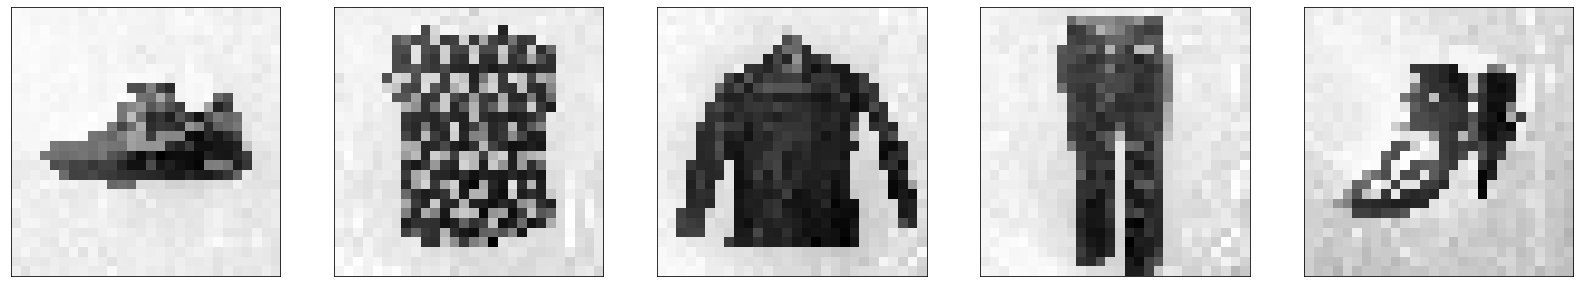

In [187]:
fig, axes = plt.subplots(1, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(28,28))
for i, axi in enumerate(axes.flat):
    axi.imshow(X_data[i], cmap = 'binary')  
    axi.set(xticks=[], yticks=[])

<h3>We are using SVM classifier to classify the validation dataset. The Validation dataset is stored in X_validate which has shape of (5,784) that is equal to (5,28*28)</h3>

In [188]:
print("X_validate shape", X_validate.shape)
print("y_validate shape", y_validate.shape)
y_validate_hat_svc = bestModel_svc.predict(X_validate)
for i in range(len(y_validate_hat_svc)):
    print(i+1,".",class_names[y_validate_hat_svc[i]])
acc = accuracy_score(y_validate,y_validate_hat_svc, normalize = True) * 100 
print(acc)

X_validate shape (5, 784)
y_validate shape (5,)
1 . Sandal
2 . Shirt
3 . Shirt
4 . Trouser
5 . Ankle boot
60.0


<h2>Final result is accurate upto 60%. However this will be more accurate with more validation data.</h2>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Nov 9 2020 at 11:59 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>